# Figure 2 - damages from extreme El Nino events
#### Christopher Callahan 
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.lines import Line2D

Data locations

In [2]:
loc_panel = "../Data/Panel/"
loc_damages = "../Data/Historical_Damages/"

#### Analysis

Read obs data if needed

In [3]:
y1 = 1960
y2 = 2019
panel = pd.read_csv(loc_panel+"ENSO_Growth_Panel_"+str(y1)+"-"+str(y2)+".csv",index_col=0)

Read damages from specific events

In [4]:
nlag = 5
y1_damages = 1982
y2_damages = 2019
event_damages = xr.open_dataset(loc_damages+"ENSO_damages_historical_extreme_elnino_e-and-c_"+str(y1_damages)+"-"+str(y2_damages)+".nc")

Get example country-level stuff

In [5]:
iso_example = "PER"
nm_example = "Peru"
tau_example = np.around(np.nanmean(panel.loc[panel.iso==iso_example,"t_p_corr_running_e"].values),2)
events = event_damages.event.values
event_example = events[1]
cf_gpc_ex = event_damages.cf_gpc.loc[event_example,iso_example,:,:]
actual_gpc_ex = event_damages.actual_gpc.loc[iso_example,:]

# run country forward under average growth from previous set of years
yrs_prev_gr = 5
cf_gr = np.nanmean(panel.loc[(panel.iso==iso_example)&(panel.year>=event_example-yrs_prev_gr)&(panel.year<=event_example-1),"gr_pwt_frac"])
cf_gpc_gr = np.zeros(nlag+2)
for c in np.arange(0,nlag+2,1):
    if c == 0:
        cf_gpc_gr[c] = actual_gpc_ex.loc[event_example-1]
    else:
        cf_gpc_gr[c] = cf_gpc_gr[c-1] + cf_gpc_gr[c-1]*cf_gr

In [6]:
panel.loc[(panel.iso==iso_example)&(panel.year>=event_example-yrs_prev_gr)&(panel.year<=event_example-1),:]

,year,iso,e,c,nino3,nino34,p_corr2_e,t_p_corr_e,t_p_reg_e,t_p_corr_running_e,...,gr_pwt_frac,gr_pop_frac,gr_cs_frac,gr_tfp_frac,gr_cspc_frac,lat,lon,region,yr_reg,income_group
11193,1993,PER,-0.212067,0.900861,-0.001040,0.236668,0.32884,1.236138,1.82296,1.177167,...,0.032594,0.019215,0.016121,0.024225,0.006063,-9.326,-75.552,904.0,1993904.0,high
11194,1994,PER,-0.536363,0.899467,-0.089809,0.015639,0.32884,1.236138,1.82296,1.177167,...,0.102211,0.018937,0.042792,0.065894,0.029223,-9.326,-75.552,904.0,1994904.0,high
11195,1995,PER,0.459405,1.101498,0.797442,1.047308,0.32884,1.236138,1.82296,1.177167,...,0.054321,0.018773,0.058098,0.010261,0.040095,-9.326,-75.552,904.0,1995904.0,high
11196,1996,PER,-0.799662,-0.046976,-0.602018,-0.693141,0.32884,1.236138,1.82296,1.177167,...,0.009108,0.018711,0.049519,-0.024799,0.032150,-9.326,-75.552,904.0,1996904.0,high
11197,1997,PER,-0.830239,0.060670,-0.625088,-0.382412,0.32884,1.236138,1.82296,1.177167,...,0.045462,0.018467,0.061387,0.009448,0.041133,-9.326,-75.552,904.0,1997904.0,high


Global damages

In [7]:
global_gdp_change = event_damages.gdp_change_ln.sum(dim="iso")
global_gdp_change_noln = event_damages.gdp_change_noln.sum(dim="iso")

1983
mean:
[-0.17178095 -4.10210808]
lower CI:
[-0.29484349 -6.01317399]
upper CI:
[-0.04345062 -2.28955161]
1998
mean:
[-0.31969606 -5.69067112]
lower CI:
[-0.54820646 -9.24130345]
upper CI:
[-0.08169389 -2.33877833]
1983
-4.102108079488418
-4.4217299857000985
1998
-5.690671122884953
-7.9768147281935144


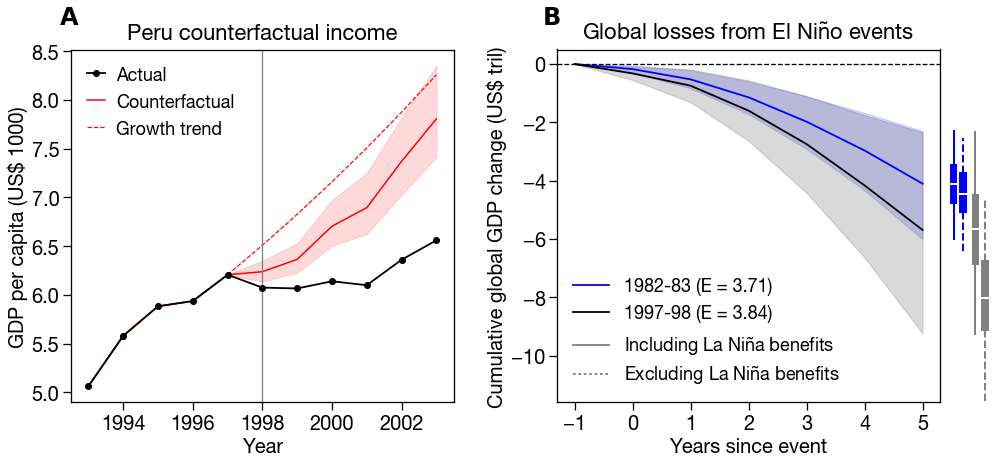

In [8]:
fig = plt.figure(figsize=(17,7))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.3
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.3
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.3
rcParams["mathtext.default"] = "regular"


gs1 = gridspec.GridSpec(1,2)
gs1.update(left=0.11,right=0.82,top=0.85,bottom=0.15,wspace=0.27,hspace=0.28)

tfs = 22
lfs = 18

## example country damages

ax = plt.subplot(gs1[0,0])

y1_ex = event_example - yrs_prev_gr - 0
y2_ex = event_example + nlag
yrs_ex = np.arange(y1_ex,y2_ex+1,1)
cf_ex_mn = cf_gpc_ex.loc[y1_ex:y2_ex,:].mean(dim="boot")/1000.
cf_ex_lower = cf_gpc_ex.loc[y1_ex:y2_ex,:].quantile(0.025,dim="boot")/1000.
cf_ex_upper = cf_gpc_ex.loc[y1_ex:y2_ex,:].quantile(0.975,dim="boot")/1000.


fit = np.polyfit(yrs_ex[0:3],actual_gpc_ex.loc[y1_ex:y1_ex+2]/1000.,1)
pred = fit[0]*yrs_ex + fit[1]

plt.plot(yrs_ex,actual_gpc_ex.loc[y1_ex:y2_ex]/1000.,
        color="black",marker="o",zorder=3,
        linewidth=1.8,label="Actual")
plt.plot(yrs_ex,cf_ex_mn,color="red",
        linewidth=1.5,linestyle="-",zorder=2,
        label="Counterfactual")
ax.fill_between(yrs_ex,cf_ex_lower,cf_ex_upper,
               color="red",alpha=0.15)

yrs_cf_gpc_gr = np.arange(event_example-1,event_example+nlag+1)
plt.plot(yrs_cf_gpc_gr,cf_gpc_gr/1000.,linewidth=1.2,color="red",
         linestyle="--",label="Growth trend")

#plt.ylim([5.45,9.1])
plt.xlim([y1_ex-0.5,y2_ex+0.5]) # extra space for legend?
#plt.xticks([y1_ex,y1_ex+2,y1_ex+4,y1_ex+6])
#plt.yticks(np.arange(3,4.4+0.1,0.2))
plt.ylabel("GDP per capita (US$ 1000)")
plt.xlabel("Year")
plt.title(nm_example+" counterfactual income",fontsize=tfs,pad=10)
plt.axvline(x=event_example,color="gray",linewidth=1.3,linestyle="-")
plt.legend(loc="upper left",frameon=False,handlelength=1,
           fontsize=lfs,handletextpad=0.6) #bbox_to_anchor=(0.57,1,0,0)




## global damages from multiple events

ax = plt.subplot(gs1[0,1])

styles = ["-","-"]
cols = ["blue","black"]
for ee in np.arange(0,len(events),1):
    e = events[ee]
    e_val = np.around(panel.loc[(panel.iso=="USA")&(panel.year==e),"e"].values[0],2)
    lb = str(e-1)+"-"+str(e-1900)+" (E = "+str(e_val)+")"
    y_1 = e-1
    y_2 = e+nlag
    global_damages = np.cumsum(global_gdp_change.loc[e,y_1:y_2,:],axis=0)/1e12
    global_damages_mean = global_damages.mean(dim="boot")
    global_damages_upper = global_damages.quantile(0.975,dim="boot")
    global_damages_lower = global_damages.quantile(0.025,dim="boot")
    
    print(e)
    print("mean:")
    print(global_damages_mean[[1,-1]].values)
    print("lower CI:")
    print(global_damages_lower[[1,-1]].values)
    print("upper CI:")
    print(global_damages_upper[[1,-1]].values)
    x = np.arange(-1,nlag+1,1)
    plt.plot(x,global_damages_mean,color=cols[ee],linewidth=1.8,
             linestyle=styles[ee],label=lb)
    ax.fill_between(x,global_damages_lower,global_damages_upper,
                    color=cols[ee],alpha=0.15)
    
    
    

plt.axhline(y=0,color="black",linewidth=1.3,linestyle="--")    
leg0 = plt.legend(loc="lower left",frameon=False,fontsize=lfs,
                 bbox_to_anchor=(0,0.18,0,0))
#title="Event"
#leg.get_title().set_fontsize(str(lfs))
leg0._legend_box.align = "left"
plt.xlabel("Years since event")
plt.ylabel("Cumulative global GDP change (US$ tril)")
yl = [-11.6,0.5]
plt.ylim(yl)
#plt.yticks([-16,-12,-8,-4,0])
plt.xticks(x)
plt.title("Global losses from El Ni$\~n$o events",
         fontsize=tfs,pad=10)

## fake elements for additional legend
custom_lines = [Line2D([0], [0], color="gray", lw=1.8,ls="-"),
                Line2D([0], [0], color="gray", lw=1.8,ls="--",dashes=[1.5,1.5])]
leg1 = ax.legend(custom_lines,['Including La Ni$\~n$a benefits','Excluding La Ni$\~n$a benefits'],
         fontsize=lfs,frameon=False,loc="lower left",
                labelspacing=0.35)
plt.gca().add_artist(leg0)
#plt.gca().add_artist(leg1)


## boxplots off to the side
ax = fig.add_axes([0.82,0.15,0.04,0.7])
cols = ["blue","gray"]
xpos = [5.5,6.3]
for ee in np.arange(0,len(events),1):
    e = events[ee]
    print(e)
    y_1 = e-1
    y_2 = e+nlag
    
    global_damages_ln = np.sum(global_gdp_change.loc[e,y_1:y_2,:],axis=0)/1e12
    global_damages_noln = np.sum(global_gdp_change_noln.loc[e,y_1:y_2,:],axis=0)/1e12
    print(global_damages_ln.mean().values)
    print(global_damages_noln.mean().values)
    b0 = ax.boxplot(global_damages_ln.values,
                     positions=[xpos[ee]],whis=[2.5,97.5],widths=0.2,
                     showcaps=False,patch_artist=True,sym="")
    b1 = ax.boxplot(global_damages_noln.values,
                     positions=[xpos[ee]+0.35],whis=[2.5,97.5],widths=0.2,
                     showcaps=False,patch_artist=True,sym="",
                   whiskerprops=dict(linestyle="--"))
    for m in range(0,2,1):
        if m == 0:
            b0["boxes"][m].set(color=cols[ee],linewidth=2)
            b0["medians"][m].set(color="white",linewidth=2)
            b1["boxes"][m].set(color=cols[ee],linewidth=2)
            b1["medians"][m].set(color="white",linewidth=2)
        b0["whiskers"][m].set(color=cols[ee],linewidth=2)
        b1["whiskers"][m].set(color=cols[ee],linewidth=2)
ax.spines["left"].set_visible(False) #.set_color([0.4,0.4,0.4])
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.patch.set_alpha(0)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(yl)
ax.set_xlim([5,6.8])




plt.figtext(0.1,0.9,r'$\bf{A}$',fontsize=24)
plt.figtext(0.495,0.9,r'$\bf{B}$',fontsize=24)

plt.savefig("../Figures/Fig2.pdf")
plt.show()

how much deviation from trend does ENSO account for?

In [9]:
actual = actual_gpc_ex.loc[yrs_cf_gpc_gr]/1000.
cf = cf_ex_mn.loc[yrs_cf_gpc_gr]
trend = cf_gpc_gr/1000.

In [10]:
trend_diff = trend - actual
cf_diff = cf - actual
print(100*cf_diff/trend_diff)

<xarray.DataArray (time: 7)>
array([        nan, 37.60681367, 39.23725175, 55.38450764, 56.4814974 ,
       66.71996619, 73.39106856])
Coordinates:
    iso      <U3 'PER'
  * time     (time) int64 1997 1998 1999 2000 2001 2002 2003
    event    int64 1998


In [11]:
np.percentile(global_damages_noln.values,[2.5,97.5])

array([-11.55917886,  -4.57550947])

In [12]:
cf_ex_mn*1000

<xarray.DataArray 'cf_gpc' (time: 11)>
array([5062.94593105, 5580.43640862, 5883.57401243, 5937.16285613,
       6207.07619791, 6238.46263077, 6364.84765603, 6704.74899052,
       6895.4952264 , 7370.77975175, 7806.45781679])
Coordinates:
    iso      <U3 'PER'
  * time     (time) int64 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
    event    int64 1998

In [13]:
(cf_ex_mn - actual_gpc_ex.loc[y1_ex:y2_ex]/1000.)*1000

<xarray.DataArray (time: 11)>
array([ 0.00000000e+00, -1.77635684e-12,  8.88178420e-13, -2.66453526e-12,
        0.00000000e+00,  1.63428226e+02,  2.98354680e+02,  5.64661355e+02,
        7.95696295e+02,  1.00993166e+03,  1.24633986e+03])
Coordinates:
    iso      <U3 'PER'
  * time     (time) int64 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
    event    int64 1998

In [14]:
(cf_ex_mn - actual_gpc_ex.loc[y1_ex:y2_ex]/1000.)/(actual_gpc_ex.loc[y1_ex:y2_ex]/1000.)*100

<xarray.DataArray (time: 11)>
array([ 0.00000000e+00, -3.18318624e-14,  1.50958995e-14, -4.48789316e-14,
        0.00000000e+00,  2.69016133e+00,  4.91807510e+00,  9.19630774e+00,
        1.30446315e+01,  1.58773114e+01,  1.89987416e+01])
Coordinates:
    iso      <U3 'PER'
  * time     (time) int64 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
    event    int64 1998

In [15]:
(cf_ex_lower - actual_gpc_ex.loc[y1_ex:y2_ex]/1000.)*1000

<xarray.DataArray (time: 11)>
array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  62.01384498, 161.87080912, 362.343714  ,
       526.893729  , 665.20096601, 852.7378304 ])
Coordinates:
  * time      (time) int64 1993 1994 1995 1996 1997 ... 1999 2000 2001 2002 2003
    quantile  float64 0.025
    iso       <U3 'PER'

In [16]:
(cf_ex_upper - actual_gpc_ex.loc[y1_ex:y2_ex]/1000.)*1000

<xarray.DataArray (time: 11)>
array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  277.04850448,  462.90211594,  833.24603201,
       1149.88840643, 1458.41938229, 1793.35338272])
Coordinates:
  * time      (time) int64 1993 1994 1995 1996 1997 ... 1999 2000 2001 2002 2003
    quantile  float64 0.975
    iso       <U3 'PER'